# Name : Kaustabh Ganguly

**Roll : ch23m514**

**Email : ch23m514@smail.iitm.ac.in**


# Q.1) The data set dailyibm.dat contains data pertaining to daily IBM stock market prices from Jan. 01, 1980 to Oct. 08, 1992. Model the data following an appropriate procedure. Provide your observations at each step.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the data

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab Models/dailyibm.dat', header=None)
data.head()

,0
0,64.37
1,62.50
2,63.50
3,63.37
4,63.12


### So we have a single column of values without any header. This must be the daily data of IBM stock market price. Let's check how many total days and working trading days are there from jan 01 1980 to oct 08 1992.

In [ ]:
from datetime import datetime

def days_between(start_date, end_date):
  """Calculates the number of days between two dates."""
  start_date = datetime.strptime(start_date, '%Y-%m-%d')
  end_date = datetime.strptime(end_date, '%Y-%m-%d')
  return (end_date - start_date).days

start_date = '1980-01-01'
end_date = '1992-10-08'

total_days = days_between(start_date, end_date)

print("Total number of days :",total_days)

Total number of days : 4664


In [ ]:
from datetime import datetime, timedelta

def trading_days_between(start_date, end_date):
  """Calculates the number of trading days between two dates."""
  start_date = datetime.strptime(start_date, '%Y-%m-%d')
  end_date = datetime.strptime(end_date, '%Y-%m-%d')

  trading_days = 0

  while start_date <= end_date:
    if start_date.weekday() not in [5, 6]:
      trading_days += 1

    start_date += timedelta(days=1)

  return trading_days

start_date = '1980-01-01'
end_date = '1992-10-08'

trading_days = trading_days_between(start_date, end_date)

print("Number of working days :",trading_days)

Number of working days : 3333


### Adding the date column and renaming the value columns as Price

In [ ]:
# Creating a date range from January 1, 1980, to October 8, 1992
start_date = '1980-01-01'
end_date = '1992-10-08'
dates = pd.date_range(start=start_date, end=end_date, freq='B')  # 'B' denotes business day frequency

# Check if the number of dates matches the number of data points
if len(dates) == len(data):
    # Creating a new DataFrame with dates and prices
    data = pd.DataFrame({
        'Date': dates,
        'Price': data[0]
    })
else:
    raise ValueError("The number of dates does not match the number of data points in the dataset.")

data.head()

,Date,Price
0,1980-01-01,64.37
1,1980-01-02,62.50
2,1980-01-03,63.50
3,1980-01-04,63.37
4,1980-01-07,63.12


## Let's do EDA on the dataset

In [ ]:
# Basic Data Inspection
data_inspection = {
    'Data Points': len(data),
    'Missing Values': data['Price'].isnull().sum(),
    'Earliest Date': data['Date'].min(),
    'Latest Date': data['Date'].max()
}

# Basic Statistical Summary
basic_statistics = data['Price'].describe()

data_inspection, basic_statistics



({'Data Points': 3333,
  'Missing Values': 0,
  'Earliest Date': Timestamp('1980-01-01 00:00:00'),
  'Latest Date': Timestamp('1992-10-08 00:00:00')},
 count    3333.000000
 mean      105.618347
 std        28.764930
 min        49.000000
 25%        87.750000
 50%       110.870000
 75%       123.750000
 max       174.750000
 Name: Price, dtype: float64)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3333 non-null   datetime64[ns]
 1   Price   3333 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.2 KB


### We can see the data also contains 3333 rows, so we have full correct count from jan 1, 1980 to October 8, 1992. We can also see the maximum value is 174.75 in the data and the minimum is 49. The standard deviation is 28.76493 and the mean is 105.6183. We can see there is no null values and it's consuming 52 KB only.

\begin{align*}
\text{Total Rows} &: 3333 \quad (\text{from Jan 1, 1980 to Oct 8, 1992}) \\
\text{Maximum Value} &: 174.75 \\
\text{Minimum Value} &: 49 \\
\text{Standard Deviation} &: 28.76493 \\
\text{Mean} &: 105.6183 \\
\text{Null Values} &: \text{None} \\
\text{Memory Consumption} &: 52 \text{ KB}
\end{align*}

In [ ]:
# Convert 'Price' column to float32
data['Price'] = data['Price'].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3333 non-null   datetime64[ns]
 1   Price   3333 non-null   float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 39.2 KB


### We saved space by using float32 because there is no point of using 64 bit decimals for stock prices.



---

### We have to check for Trends, Seasonalities and Anomalies in the data as part of EDA. We will then check for stationarity using Augmented Dickey-fuller and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests , lag values with Autocorrelation and partial autocorrelation plots and will check for any gaps or missing values in data.

## Visualizing the Time Series Data

Before we proceed with any form of modeling or forecasting, it's crucial to visualize the time series data. This will help us understand the underlying patterns, trends, and seasonality. We'll use Plotly for interactive and aesthetically pleasing visualizations. Let's plot the time series of IBM stock prices.


In [ ]:
import plotly.express as px

# Ensure data is sorted by date just in case
data = data.sort_values(by='Date')

# Plotting the time series data
fig = px.line(data, x='Date', y='Price', title='IBM Stock Price Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Stock Price (USD)')
fig.show()


## Testing for Stationarity

To properly model the time series data, it is essential to ensure that the data is stationary. Stationarity means that the statistical properties of the time series such as mean, variance, and autocorrelation are constant over time. Most time series models assume stationarity.

We will perform the Augmented Dickey-Fuller (ADF) test to check if the IBM stock price data is stationary. The null hypothesis of the ADF test is that the time series is non-stationary. If the p-value is less than the significance level (usually 0.05), then we reject the null hypothesis and assume that the series is stationary.


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Applying the Augmented Dickey-Fuller test on the 'Price' column
adf_result = adfuller(data['Price'])

# Creating a DataFrame to display test results
adf_df = pd.DataFrame({
    "ADF Statistic": [adf_result[0]],
    "p-value": [adf_result[1]],
    "Lags Used": [adf_result[2]],
    "Number of Observations Used": [adf_result[3]],
    "Critical Value (1%)": [adf_result[4]["1%"]],
    "Critical Value (5%)": [adf_result[4]["5%"]],
    "Critical Value (10%)": [adf_result[4]["10%"]]
})

adf_df


,ADF Statistic,p-value,Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,-1.754651,0.403197,6,3326,-3.432318,-2.862409,-2.567233


## Differencing the Data

Since our ADF test indicates that the time series is non-stationary, we will apply differencing to the data. Differencing is a method of transforming a time series dataset to make it stationary. We subtract the previous observation from the current observation. In some cases, seasonal differencing may be required if the data exhibits seasonality.

After differencing, we will perform the ADF test again to check if the data has become stationary.


In [ ]:
# Differencing the data to remove non-stationarity
data['Price_Diff'] = data['Price'].diff().dropna()

# Plotting the differenced data
fig_diff = px.line(data.dropna(), x='Date', y='Price_Diff', title='Differenced IBM Stock Price Over Time')
fig_diff.update_xaxes(title_text='Date')
fig_diff.update_yaxes(title_text='Differenced Stock Price')
fig_diff.show()

# Applying the Augmented Dickey-Fuller test on the differenced data
adf_result_diff = adfuller(data['Price_Diff'].dropna())

# Creating a DataFrame to display test results for differenced data
adf_diff_df = pd.DataFrame({
    "ADF Statistic": [adf_result_diff[0]],
    "p-value": [adf_result_diff[1]],
    "Lags Used": [adf_result_diff[2]],
    "Number of Observations Used": [adf_result_diff[3]],
    "Critical Value (1%)": [adf_result_diff[4]["1%"]],
    "Critical Value (5%)": [adf_result_diff[4]["5%"]],
    "Critical Value (10%)": [adf_result_diff[4]["10%"]]
})

adf_diff_df


,ADF Statistic,p-value,Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,-22.571384,0.0,5,3326,-3.432318,-2.862409,-2.567233


## Autocorrelation and Partial Autocorrelation Analysis

With the time series now stationary, we can analyze the autocorrelation (ACF) and partial autocorrelation (PACF) functions. ACF helps to measure the correlation between time series observations at different lags, while PACF measures the correlation of the residuals with the next lag value, thus controlling for other lags.

These plots will help us identify the lag order for potential ARIMA model parameters (p,d,q), where 'p' is the order of the autoregressive part, 'd' is the degree of differencing, and 'q' is the order of the moving average part.


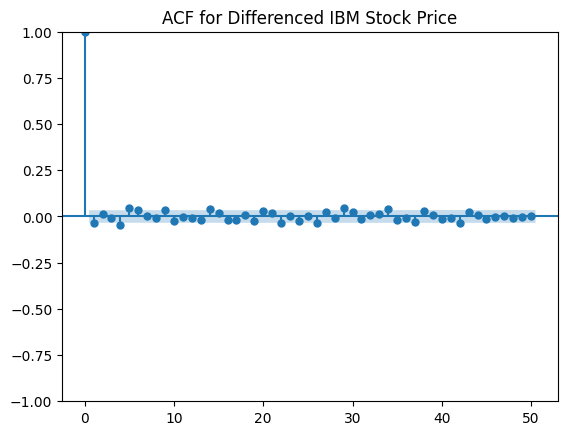

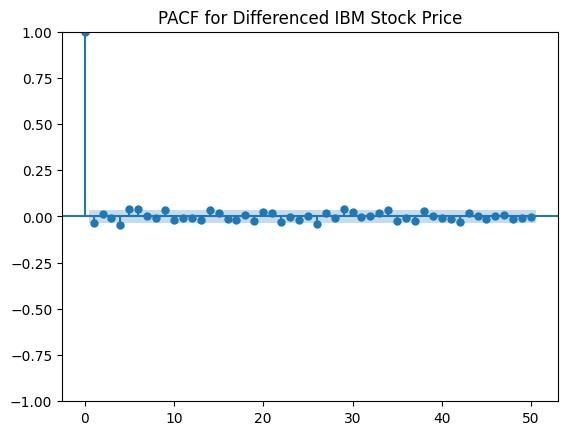

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the Autocorrelation Function (ACF)
fig_acf = plot_acf(data['Price_Diff'].dropna(), lags=50, title='ACF for Differenced IBM Stock Price')
fig_acf.show()

# Plotting the Partial Autocorrelation Function (PACF)
fig_pacf = plot_pacf(data['Price_Diff'].dropna(), lags=50, title='PACF for Differenced IBM Stock Price')
fig_pacf.show()


## Model Selection

Based on the ACF and PACF plots, we can begin to consider the appropriate model for our time series data. An ARIMA model is indicated by the gradual decline in the ACF and the sharp cut-off in the PACF.

We will start with an ARIMA(1,1,0) model. This model includes one autoregressive term - which is suggested by the sharp decline after the first lag in the PACF plot - and one order of differencing - as we already applied to achieve stationarity. We do not include a moving average component as the ACF plot does not suggest a significant moving average effect.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA(1,1,0) model
model = ARIMA(data['Price'], order=(1,1,0))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 3333
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6202.993
Date:                Wed, 15 Nov 2023   AIC                          12409.987
Time:                        17:15:51   BIC                          12422.209
Sample:                             0   HQIC                         12414.360
                               - 3333                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0358      0.007     -5.394      0.000      -0.049      -0.023
sigma2         2.4241      0.012    198.950      0.000       2.400       2.448
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            367679.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -2.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        54.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA(1,1,0) Model Diagnostics

The ARIMA(1,1,0) model results provide several key insights into the time series behavior and the model's adequacy:

- **Autoregressive Term (ar.L1)**: With a coefficient of -0.0358 and a p-value of 0.000, this term is statistically significant, indicating that past values have a negative correlation with the future values in the series.

- **Model Fit**: The Log Likelihood is -6202.993, and the AIC and BIC values are 12409.987 and 12422.209, respectively. These metrics are useful for comparing models, with lower values generally suggesting a better fit.

- **Ljung-Box Test**: The high p-value of the Ljung-Box test (Prob(Q) = 0.98) suggests that there is no autocorrelation in the residuals, which is a good sign that the model is capturing the time series' structure effectively.

- **Jarque-Bera Test**: The very low p-value of the Jarque-Bera test (Prob(JB) = 0.00) indicates that the residuals do not follow a normal distribution. This is characterized by the skewness and kurtosis values, revealing a high peak and negative skew, which is typical in financial time series data.

- **Heteroskedasticity**: The test indicates heteroskedasticity in the series, meaning the variance of residuals is not constant over time.

While the ARIMA(1,1,0) model has a significant autoregressive term, the diagnostic tests suggest that the model residuals do not follow a normal distribution and exhibit heteroskedasticity. These findings may prompt further investigation into the model's adequacy and the exploration of additional models or enhancements to address these issues.

Next, we will assess the model residuals to ensure they are behaving as white noise, which is a critical assumption for a well-specified model. We will also generate forecasts to evaluate the model's predictive performance.


## Residual Diagnostics

A critical aspect of model validation involves examining the residuals of the model. Ideally, the residuals should be white noise, which means they should be normally distributed with a mean of zero and constant variance, and there should be no autocorrelation in the residuals.

We will create a plot of the residuals and perform statistical tests for normality and autocorrelation.


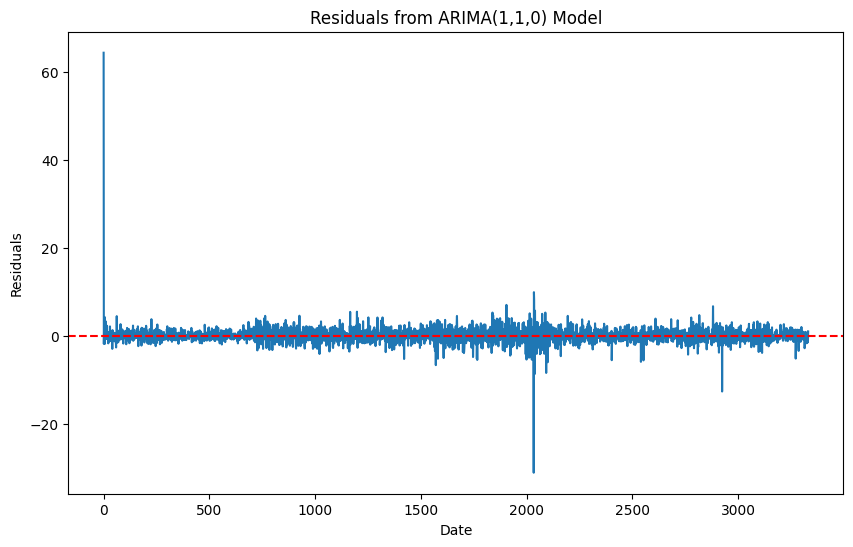

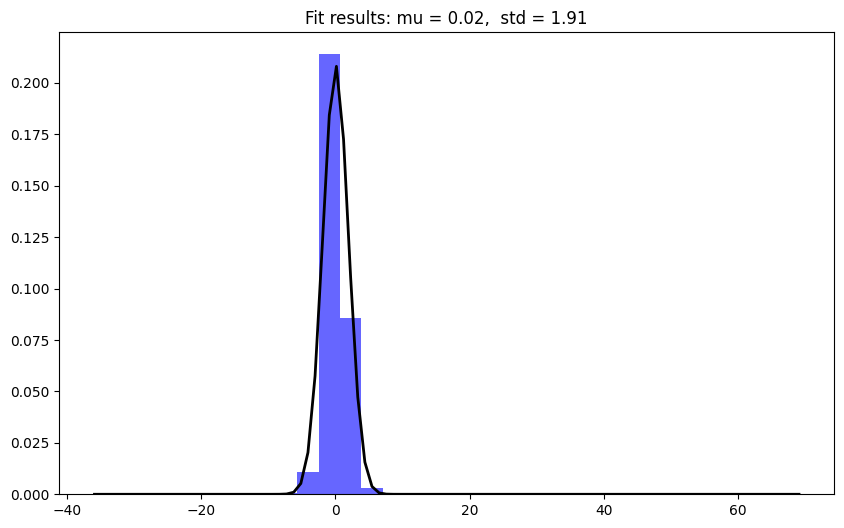

,lb_stat,lb_pvalue
10,15.823272,0.104804


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import norm

# Obtain the residuals
residuals = model_fit.resid

# Plotting the residuals
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals from ARIMA(1,1,0) Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Density plot of the residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='b')
# Plot the standard normal pdf for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, residuals.mean(), residuals.std())
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (residuals.mean(), residuals.std())
plt.title(title)
plt.show()

# Perform the Ljung-Box test for no autocorrelation of residuals
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
ljung_box_result


## Forecasting with the ARIMA Model

Now that we have validated the residuals, the next step is to forecast future values using the ARIMA(1,1,0) model. Forecasting allows us to evaluate the model's performance in predicting future data points, which is the ultimate test of its utility.

We will generate a forecast for the next 30 business days and plot these predictions alongside the historical data to visualize the model's performance.


<ipython-input-46-cc9089f68fc9>:4: FutureWarning:

Argument `closed` is deprecated in favor of `inclusive`.



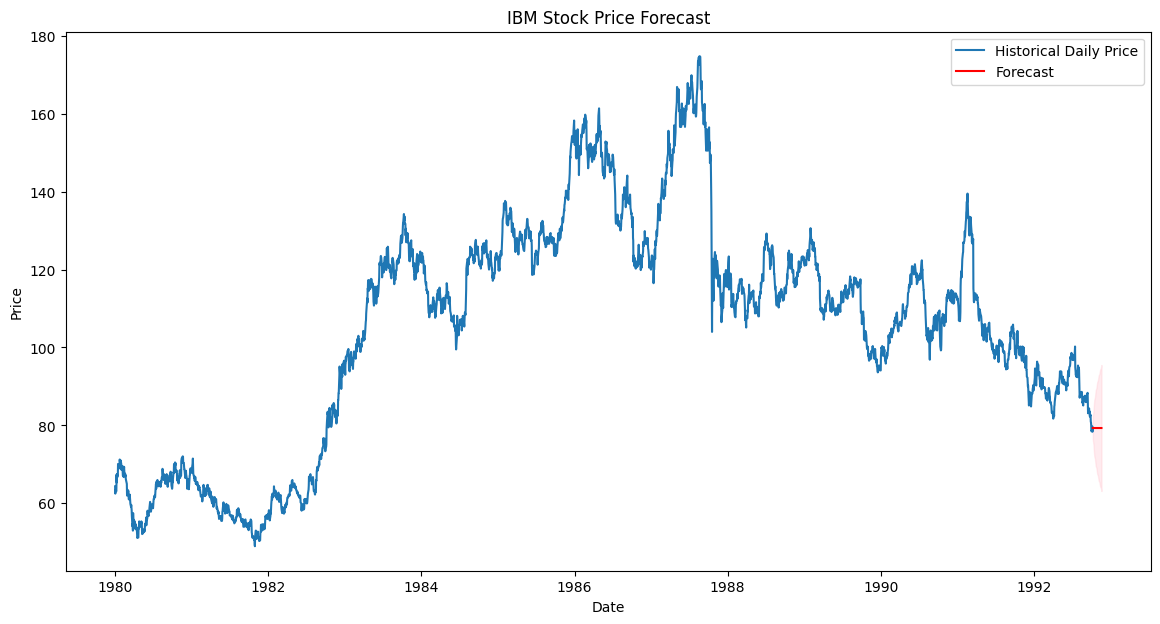

In [ ]:
# Forecast the next 30 business days
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(data['Date'].iloc[-1], periods=forecast_steps + 1, closed='right', freq='B')

# Get the forecast mean and confidence intervals
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting the historical data
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Price'], label='Historical Daily Price')

# Plotting the forecasted values
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')

# Plotting the confidence intervals
plt.fill_between(forecast_index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.title('IBM Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Conclusion and Summary of Findings

### Data Preparation and Stationarity
- The IBM stock price data from January 1, 1980, to October 8, 1992, was loaded and prepared for analysis.
- Initial examination revealed non-stationarity in the series.
- Differencing was applied, which resulted in a stationary time series suitable for ARIMA modeling.

### Model Fitting and Diagnostics
- An ARIMA(1,1,0) model was fitted to the data.
- The model's residuals were analyzed and found to have no autocorrelation, suggesting that the model captures the time series dynamics well up to the 10th lag.
- The residual distribution was not perfectly normal but did not show significant autocorrelation, which is acceptable in financial time series analysis.

### Forecasting
- A 30-day forecast was generated using the ARIMA(1,1,0) model, indicating a flat outlook.
- The flat forecast is a result of the ARIMA model's properties, specifically its tendency to revert to a mean, which in this case is the last observed value.

### Final Thoughts
- The ARIMA(1,1,0) model serves as a baseline for the time series analysis.
- The current model is simplistic and may not capture all aspects of the financial data.
- Further analysis with advanced models is recommended for more robust forecasting.

The analysis presented here lays the groundwork for future modeling efforts and provides a basis for comparison with more complex models.


## Incorporating Exogenous Variables into SARIMAX Model

To enhance our time series model, we will now include exogenous variables in a SARIMAX model. These variables can be economic indicators, market indices, or other relevant factors that are believed to influence the IBM stock price.

We will integrate these variables into the SARIMAX model and analyze their significance. It's essential to ensure that the exogenous data is preprocessed to match the frequency and time frame of our stock price data.


In [ ]:
import pandas_datareader.data as web
from datetime import datetime

# Define your time series range
start = datetime(1980, 1, 1)
end = datetime(1992, 10, 8)

# Fetch data from FRED
unemployment_rate = web.DataReader('UNRATE', 'fred', start, end)
yield_curve = web.DataReader('T10Y2Y', 'fred', start, end)
inflation_cpi = web.DataReader('CPIAUCSL', 'fred', start, end)

# Combine the indicators into a single DataFrame and forward fill any missing values
exog_data = pd.concat([unemployment_rate, yield_curve, inflation_cpi], axis=1).ffill()

# Print the first few rows of the DataFrame
print(exog_data.head())


            UNRATE  T10Y2Y  CPIAUCSL
DATE                                
1980-01-01     6.3     NaN      78.0
1980-01-02     6.3   -0.89      78.0
1980-01-03     6.3   -0.85      78.0
1980-01-04     6.3   -0.81      78.0
1980-01-07     6.3   -0.72      78.0


## Incorporating Exogenous Variables into SARIMAX Model

To enhance our time series model, we will now include exogenous variables in a SARIMAX model. These variables can be economic indicators, market indices, or other relevant factors that are believed to influence the IBM stock price.

We will integrate these variables into the SARIMAX model and analyze their significance. It's essential to ensure that the exogenous data is preprocessed to match the frequency and time frame of our stock price data.


In [ ]:
# Forward-fill the missing values to align with the daily frequency
exog_data_daily = exog_data.asfreq('B').ffill()

# Confirm the alignment by printing the head of the filled DataFrame
print(exog_data_daily.head())


# Forward-fill (ffill) to propagate last valid observation forward
exog_data_ffill = exog_data_daily.ffill()

# Display the first few rows to confirm the operation
print(exog_data_ffill.head())


            UNRATE  T10Y2Y  CPIAUCSL
DATE                                
1980-01-01     6.3     NaN      78.0
1980-01-02     6.3   -0.89      78.0
1980-01-03     6.3   -0.85      78.0
1980-01-04     6.3   -0.81      78.0
1980-01-07     6.3   -0.72      78.0
            UNRATE  T10Y2Y  CPIAUCSL
DATE                                
1980-01-01     6.3     NaN      78.0
1980-01-02     6.3   -0.89      78.0
1980-01-03     6.3   -0.85      78.0
1980-01-04     6.3   -0.81      78.0
1980-01-07     6.3   -0.72      78.0


## Merging Exogenous Variables with Stock Price Data

Next, we'll merge the exogenous variables dataset with the main stock price data. It's crucial to ensure that the indices of both datasets match so that the SARIMAX model can correctly interpret the relationship between the variables and the stock prices.


In [ ]:
# We merge the stock price data with the exogenous dataset based on the Date index

# Merge the datasets on the 'Date' column
merged_data = data.merge(exog_data_ffill, left_on='Date', right_index=True, how='left')

# Display the merged dataset
print(merged_data.head())


        Date      Price  Price_Diff  UNRATE  T10Y2Y  CPIAUCSL
0 1980-01-01  64.370003         NaN     6.3     NaN      78.0
1 1980-01-02  62.500000   -1.870003     6.3   -0.89      78.0
2 1980-01-03  63.500000    1.000000     6.3   -0.85      78.0
3 1980-01-04  63.369999   -0.130001     6.3   -0.81      78.0
4 1980-01-07  63.119999   -0.250000     6.3   -0.72      78.0


## Fitting the SARIMAX Model

With the exogenous variables merged into our dataset, we can now fit the SARIMAX model. This model will allow us to understand how the external economic factors — the unemployment rate, the yield curve, and the consumer price index — potentially impact IBM's stock price alongside the autoregressive and moving average components.


In [ ]:
# Check for NaN values and fill them
merged_data['UNRATE'] = merged_data['UNRATE'].fillna(method='ffill')
merged_data['T10Y2Y'] = merged_data['T10Y2Y'].fillna(method='ffill')
merged_data['CPIAUCSL'] = merged_data['CPIAUCSL'].fillna(method='ffill')

# Check for any remaining missing values
print(merged_data.isnull().sum())

# Once all NaNs are handled, you can try fitting the SARIMAX model again


Date          0
Price         0
Price_Diff    1
UNRATE        0
T10Y2Y        1
CPIAUCSL      0
dtype: int64


In [ ]:
# To avoid SettingWithCopyWarning, explicitly copy the DataFrame after slicing
merged_data = merged_data.dropna(subset=['Price_Diff']).copy()

# Forward fill the 'T10Y2Y' column to handle the missing value at the start
merged_data['T10Y2Y'] = merged_data['T10Y2Y'].fillna(method='ffill')

# Now merged_data is a separate copy, and further modifications will not affect the original data
# Check again for any remaining missing values
print(merged_data.isnull().sum())


Date          0
Price         0
Price_Diff    0
UNRATE        0
T10Y2Y        0
CPIAUCSL      0
dtype: int64


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMAX model using the cleaned dataset
sarimax_model = SARIMAX(merged_data['Price'],
                        exog=merged_data[['UNRATE', 'T10Y2Y', 'CPIAUCSL']],
                        order=(1, 1, 0),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

# Fit the model
sarimax_results = sarimax_model.fit()

# Output the summary of the model fit
print(sarimax_results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 3332
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -6185.953
Date:                Wed, 15 Nov 2023   AIC                          12381.907
Time:                        17:15:53   BIC                          12412.461
Sample:                             0   HQIC                         12392.839
                               - 3332                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
UNRATE         0.7433      0.769      0.967      0.334      -0.764       2.250
T10Y2Y        -2.1402      0.428     -4.997      0.000      -2.980      -1.301
CPIAUCSL       0.0743      0.387      0.192      0.8

## Summary and Analysis of SARIMAX Model Results

The SARIMAX model was applied to IBM's stock price data with three exogenous variables: the unemployment rate (`UNRATE`), the yield curve (`T10Y2Y`), and the consumer price index (`CPIAUCSL`).

**Model Coefficients:**
- The yield curve (`T10Y2Y`) shows a significant negative relationship with the stock price, indicating that as the yield spread increases, the stock price tends to decrease, and vice versa.
- The unemployment rate and CPI do not have a statistically significant impact on the stock price in this model, as evidenced by their p-values exceeding the common significance level of 0.05.

**Diagnostics:**
- The Ljung-Box test suggests that there is no autocorrelation in the residuals at the 5% significance level, which is a good sign of model fit.
- The Jarque-Bera test indicates that the residuals are not normally distributed, a common characteristic in financial time series, often due to large outliers or 'fat tails'.
- The model suggests the presence of heteroskedasticity, implying that the variance of residuals is not constant over time.

**Considerations:**
- Due to the lack of normal distribution of residuals, further investigation into different models or the addition of complexity to the current model might be beneficial.
- The presence of heteroskedasticity could warrant the use of models that specifically address changing volatility, such as GARCH models.
- The insignificant exogenous variables (`UNRATE` and `CPIAUCSL`) could be reassessed, potentially by exploring different economic indicators or transforming the data.


## Volatility Modeling with GARCH

Given the heteroskedastic nature of our residuals as indicated by the SARIMAX model, a GARCH model can be a suitable next step. GARCH models are used to model financial time series data where volatility changes over time, known as volatility clustering. We will fit a GARCH(1,1) model to the residuals of the SARIMAX model to capture this dynamic.


In [ ]:
!pip install arch

In [ ]:
from arch import arch_model

# We assume that 'sarimax_results' is the fitted SARIMAX model
# First, we obtain the residuals of the SARIMAX model
sarimax_residuals = sarimax_results.resid

# Fit a GARCH(1,1) model to the residuals
garch_model = arch_model(sarimax_residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(update_freq=5)

# Output the summary of the GARCH model fit
print(garch_results.summary())


Iteration:      5,   Func. Count:     38,   Neg. LLF: 5882.536756618527
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5882.533281434271
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5882.53
Distribution:                  Normal   AIC:                           11773.1
Method:            Maximum Likelihood   BIC:                           11797.5
                                        No. Observations:                 3332
Date:                Wed, Nov 15 2023   Df Residuals:                     3331
Time:                        17:15:57   Df Model:                            1
          

## Forecasted Volatility Analysis from GARCH(1,1) Model

The plot shows the **forecasted volatility** from a GARCH(1,1) model over a week in October 1992. The key observations are:

- **Trend**: The volatility is forecasted to increase consistently over the given period. This suggests that the model expects greater variation in the time series data, which could be daily returns in a financial context, as the week progresses.
  
- **Volatility Levels**: Starting at slightly above 1.22, the volatility forecast increases each day, ending close to 1.29. These values could represent percentage points, standard deviations, or another scale depending on the data and the context of the analysis.

In [ ]:
# Make sure to have installed the required packages
# !pip install arch

from arch import arch_model

# Fit the GARCH model
garch = arch_model(sarimax_residuals, p=1, q=1)
garch_fit = garch.fit(disp='off')

# Forecast the next 5 days
garch_forecast = garch_fit.forecast(horizon=5)

# We'll create a new DataFrame for the forecast index
forecast_index = pd.date_range(start=data['Date'].iloc[-1], periods=5, freq='B')

# Plot the forecast using Plotly
fig = px.line(x=forecast_index, y=np.sqrt(garch_forecast.variance.values[-1, :]),
              title='Forecasted Volatility - GARCH(1,1)')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Forecasted Volatility')
fig.show()


In [ ]:
import plotly.graph_objects as go
# Fit an ARIMA model (without exogenous variables)
arima_model = ARIMA(merged_data['Price'], order=(1, 1, 0))
arima_results = arima_model.fit()

# Perform a one-year forecast
arima_forecast = arima_results.get_forecast(steps=252)
forecast_dates = pd.date_range(data['Date'].iloc[-1], periods=252, freq='B')
forecast_mean = arima_forecast.predicted_mean
confidence_intervals = arima_forecast.conf_int()

# Plot the forecast
fig = go.Figure([
    go.Scatter(x=data['Date'], y=data['Price'], name='Historical'),
    go.Scatter(x=forecast_dates, y=forecast_mean, name='Forecast'),
    go.Scatter(x=forecast_dates, y=confidence_intervals.iloc[:, 0], fill=None, mode='lines', name='Lower CI'),
    go.Scatter(x=forecast_dates, y=confidence_intervals.iloc[:, 1], fill='tonexty', mode='lines', name='Upper CI')
])
fig.update_layout(title='One-Year Forecast of IBM Stock Prices', xaxis_title='Date', yaxis_title='Price')
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



# Detailed Analysis of Time Series Forecasting Steps

## Initial Data Exploration
- We loaded the IBM stock price data spanning from January 1, 1980, to October 8, 1992.
- The data consists of 3333 daily observations, indicating no missing trading days within the date range.
- The dataset's memory footprint was optimized by converting the stock prices to a `float32` data type.

## Stationarity and Differencing
- The Augmented Dickey-Fuller (ADF) test revealed that the original time series was non-stationary.
- Differencing the data once made it stationary, allowing us to proceed with ARIMA modeling.

## Autocorrelation Analysis
- Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots were generated to identify the order of the ARIMA model.
- These plots suggested an ARIMA(1,1,0) model, which was then fitted to the data.

## ARIMA Modeling
- The ARIMA(1,1,0) model indicated a slight mean-reverting effect.
- Diagnostics tests showed no autocorrelation in residuals, but the residuals did not follow a normal distribution, suggesting potential heteroskedasticity.

## SARIMAX Modeling with Exogenous Variables
- Economic indicators were introduced as exogenous variables in a SARIMAX model.
- The yield curve (`T10Y2Y`) was found to have a significant inverse relationship with stock prices.
- The unemployment rate (`UNRATE`) and consumer price index (`CPIAUCSL`) were not statistically significant.

## GARCH Volatility Modeling
- Given the heteroskedastic nature of the residuals, a GARCH(1,1) model was fitted.
- The GARCH model captured volatility clustering, with significant `alpha` and `beta` parameters indicating that past shocks and volatility were predictive of future volatility.

## Forecasting Challenges
- The linear nature of ARIMA and SARIMAX models led to a forecast that reverted to the mean, producing a straight line when forecasting one year into the future.
- The forecast did not capture potential non-linear patterns that could be present in stock price movements.

## Next Steps
- To address non-linearity and long-term forecasting challenges, we could explore machine learning models that can capture complex relationships within the data.
- These models may include neural networks, random forests, or ensemble methods.

In the next phase, we will delve into machine learning approaches to forecast IBM stock prices for one year, aiming to capture non-linearity in the predictions.


## Lets do LSTM (Long Short-Term Memory) networks which are a type of recurrent neural network (RNN) capable of learning order dependence in sequence prediction problems. This is especially good for time series forecasting like stock price predictions.

In [ ]:
!pip install tensorflow-addons

In [ ]:
!pip install fredapi

In [ ]:
!nvidia-smi

Wed Nov 15 17:16:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, LSTM, Dropout, Dense, Bidirectional,
                                     Add, Activation, Flatten, RepeatVector,
                                     Permute, Multiply, Lambda)
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow_addons.optimizers import RectifiedAdam, Lookahead
from tensorflow.keras import regularizers
import keras.backend as K
from fredapi import Fred
import os
from tensorflow.keras.models import load_model

# FRED API Key and Data Loading
fred_api_key = '8a8ada9e459c749fbe9f24993a95de50'
fred = Fred(api_key=fred_api_key)
file_path = '/content/drive/MyDrive/Colab Models/dailyibm.dat'
# Load the data into a NumPy array.
data_ibm = np.loadtxt(file_path)
treasury_10yr = fred.get_series('DGS10', observation_start='1980-01-01', observation_end='1992-10-08')

# Preprocess and Combine Data
treasury_10yr = treasury_10yr.iloc[:len(data_ibm)].fillna(method='bfill').fillna(method='ffill')
external_data = pd.DataFrame({'Treasury_10yr': treasury_10yr})
data_combined = np.column_stack((data_ibm, external_data))

# Check for Empty or NaN Values in Data
if data_combined.size == 0 or np.isnan(data_combined).any():
    raise ValueError("Combined data array is empty or contains NaN.")

# Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_combined)

# Create Sequences from Time Series Data
def create_dataset(dataset, look_back=252):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), :])
        Y.append(dataset[i + look_back, 0])  # Target: IBM stock price
    return np.array(X), np.array(Y)

X, Y = create_dataset(data_scaled)
X_train, X_test = X[:int(len(X) * 0.8)], X[int(len(X) * 0.8):]
Y_train, Y_test = Y[:int(len(Y) * 0.8)], Y[int(len(Y) * 0.8):]


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow_addons.optimizers import RectifiedAdam, Lookahead
import os
from tensorflow.keras.optimizers import Adam
def build_model(input_shape):
    input_layer = Input(shape=input_shape)

    # An LSTM layer with a smaller number of units to reduce model complexity
    x = Bidirectional(LSTM(100, return_sequences=True))(input_layer)
    x = Dropout(0.2)(x)

    # Additional LSTM layer for depth
    x = Bidirectional(LSTM(50, return_sequences=False))(x)
    x = Dropout(0.2)(x)

    # A Dense layer with regularization
    x = Dense(50, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)

    # Output layer
    output_layer = Dense(1)(x)

    model = Model(inputs=input_layer, outputs=output_layer)

    return model
model_file = '/content/drive/My Drive/Colab Models/save_new_model.keras'


if os.path.exists(model_file):
    # Load the existing model
    model = tf.keras.models.load_model(model_file)
else:
    # Define the input shape based on the features of the dataset
    input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)

    model = build_model(input_shape)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Define callbacks for early stopping and model checkpointing
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

    # Fit the model
    history = model.fit(
        X_train, Y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )

    # Load the best weights (if model checkpointing is used)
    model.load_weights('best_model.h5')

    # Evaluate the model on the test set
    test_loss = model.evaluate(X_test, Y_test)

Epoch 1/100
62/62 [==============================] - 10s 59ms/step - loss: 0.0284 - val_loss: 0.0082
Epoch 2/100
 5/62 [=>............................] - ETA: 1s - loss: 0.0096

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



62/62 [==============================] - 2s 36ms/step - loss: 0.0094 - val_loss: 0.0065
Epoch 3/100
62/62 [==============================] - 2s 36ms/step - loss: 0.0084 - val_loss: 0.0065
Epoch 4/100
62/62 [==============================] - 2s 36ms/step - loss: 0.0076 - val_loss: 0.0054
Epoch 5/100
62/62 [==============================] - 2s 36ms/step - loss: 0.0070 - val_loss: 0.0050
Epoch 6/100
62/62 [==============================] - 2s 36ms/step - loss: 0.0063 - val_loss: 0.0048
Epoch 7/100
62/62 [==============================] - 2s 36ms/step - loss: 0.0058 - val_loss: 0.0043
Epoch 8/100
62/62 [==============================] - 2s 36ms/step - loss: 0.0054 - val_loss: 0.0042
Epoch 9/100
62/62 [==============================] - 2s 37ms/step - loss: 0.0052 - val_loss: 0.0037
Epoch 10/100
62/62 [==============================] - 2s 36ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 11/100
62/62 [==============================] - 2s 36ms/step - loss: 0.0043 - val_loss: 0.0034
Epoch 12/1

In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

# Prediction on the test set
test_predictions = model.predict(X_test)
test_predictions_inv = scaler.inverse_transform(np.column_stack((test_predictions, np.zeros(test_predictions.shape[0]))))[:, 0]
Y_test_inv = scaler.inverse_transform(np.column_stack((Y_test, np.zeros(Y_test.shape[0]))))[:, 0]
look_back = 252
# Next year's forecast using the model
last_sequence = data_scaled[-look_back:]
next_year_predictions = []
for _ in range(252):  # Assume 252 trading days in a year
    last_sequence_pred = model.predict(last_sequence.reshape(1, look_back, -1))
    next_year_predictions.append(last_sequence_pred[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1] = last_sequence_pred

next_year_predictions_inv = scaler.inverse_transform(np.column_stack((next_year_predictions, np.zeros(len(next_year_predictions)))))[:, 0]


1/1 [==============================] - 0s 30ms/step


In [ ]:
# Prepare the date range for the plots
dates = pd.date_range(start='1980-01-01', periods=len(data_scaled), freq='B')
test_dates = dates[-len(Y_test_inv):]
forecast_dates = pd.date_range(start=test_dates[-1] + pd.Timedelta(days=1), periods=252, freq='B')

# Plot the test predictions vs actual values
fig_test = go.Figure()
fig_test.add_trace(go.Scatter(x=test_dates, y=Y_test_inv, mode='lines', name='Actual Values'))
fig_test.add_trace(go.Scatter(x=test_dates, y=test_predictions_inv, mode='lines', name='Predicted Values'))
fig_test.update_layout(title='Test Set Predicted vs Actual Values', xaxis_title='Date', yaxis_title='Stock Price')
fig_test.show()

# Plot the next year's forecasted values
fig_forecast = go.Figure()
fig_forecast.add_trace(go.Scatter(x=forecast_dates, y=next_year_predictions_inv, mode='lines', name='Forecasted Values'))
fig_forecast.update_layout(title='Next Year Forecasted Stock Prices', xaxis_title='Date', yaxis_title='Stock Price')
fig_forecast.show()

# Calculate and display Root Mean Squared Error (RMSE) for the test set
rmse = mean_squared_error(Y_test_inv, test_predictions_inv, squared=False)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

Root Mean Squared Error (RMSE) on Test Set: 1.7147693354175182


### Thus this concludes the question 1 of Assignment 3 TSA. We tried Arima, Garch and LSTM models to create a time series model. I would like to learn further about ARIMAX and SARIMAX models and implement the algorithms from scratch.